<a href="https://colab.research.google.com/github/Max640a/ChyselniMetody_lab/blob/main/%D0%9B%D0%A08!_%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D1%8E%D0%BA_%D0%92%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%824.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. спосіб.

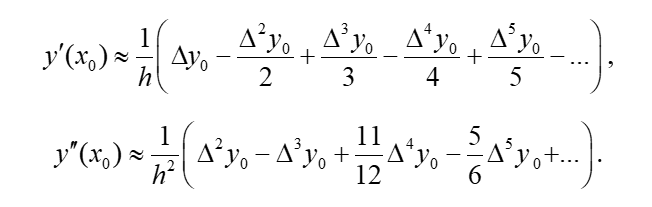

In [1]:
import numpy as np

# --- ВАРІАНТ 4 ---
# Таблиця значень функції
x_values = np.array([1.5, 2.0, 2.5, 3.0, 3.5, 4.0])
y_values = np.array([10.517, 10.193, 9.807, 9.387, 8.977, 8.637])

# Крок таблиці
h = x_values[1] - x_values[0]

# Обчислення кінцевих різниць
def finite_differences(y):
    n = len(y)
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            delta_y[i, j] = delta_y[i + 1, j - 1] - delta_y[i, j - 1]

    return delta_y

# Отримуємо таблицю кінцевих різниць
delta_table = finite_differences(y_values)

# Виводимо таблицю кінцевих різниць для наочності
print("Таблиця кінцевих різниць:")
np.set_printoptions(precision=4, suppress=True)
print(delta_table)

# Значення кінцевих різниць для першої та другої похідних
# Для Варіанту 4 шукаємо похідні в точці x = 2.0. Це елемент з індексом 1 (другий рядок).
idx = 1
delta_y1 = delta_table[idx, 1]  # Δy1
delta2_y1 = delta_table[idx, 2] # Δ²y1
delta3_y1 = delta_table[idx, 3] # Δ³y1
delta4_y1 = delta_table[idx, 4] # Δ⁴y1

# Функція для обчислення першої похідної за формулою Ньютона
def first_derivative(delta_y1, delta2_y1, delta3_y1, delta4_y1, h):
    return (delta_y1 - delta2_y1 / 2 + delta3_y1 / 3 - delta4_y1 / 4) / h

# Функція для обчислення другої похідної за формулою Ньютона
def second_derivative(delta2_y1, delta3_y1, delta4_y1, h):
    return (delta2_y1 - delta3_y1 + 11*delta4_y1 / 12) / h**2

# Обчислюємо першу та другу похідні в точці x = 2.0
y1_prime = first_derivative(delta_y1, delta2_y1, delta3_y1, delta4_y1, h)
y1_double_prime = second_derivative(delta2_y1, delta3_y1, delta4_y1, h)

# Округляємо до точності 0.001
y1_prime = round(y1_prime, 3)
y1_double_prime = round(y1_double_prime, 3)

# Виводимо результати
print(f"\nПерша похідна y'(2.0) ≈ {y1_prime}")
print(f"Друга похідна y''(2.0) ≈ {y1_double_prime}")

Таблиця кінцевих різниць:
[[10.517 -0.324 -0.062  0.028  0.016 -0.   ]
 [10.193 -0.386 -0.034  0.044  0.016  0.   ]
 [ 9.807 -0.42   0.01   0.06   0.     0.   ]
 [ 9.387 -0.41   0.07   0.     0.     0.   ]
 [ 8.977 -0.34   0.     0.     0.     0.   ]
 [ 8.637  0.     0.     0.     0.     0.   ]]

Перша похідна y'(2.0) ≈ -0.717
Друга похідна y''(2.0) ≈ -0.253


In [ ]:
delta_table

array([[1.2733, 0.5274, 0.0325, 0.0047, 0.0002, 0.    ],
       [1.8007, 0.5599, 0.0372, 0.0049, 0.0002, 0.    ],
       [2.3606, 0.5971, 0.0421, 0.0051, 0.    , 0.    ],
       [2.9577, 0.6392, 0.0472, 0.    , 0.    , 0.    ],
       [3.5969, 0.6864, 0.    , 0.    , 0.    , 0.    ],
       [4.2833, 0.    , 0.    , 0.    , 0.    , 0.    ]])

2. спосіб

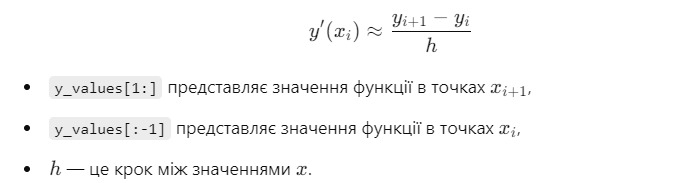

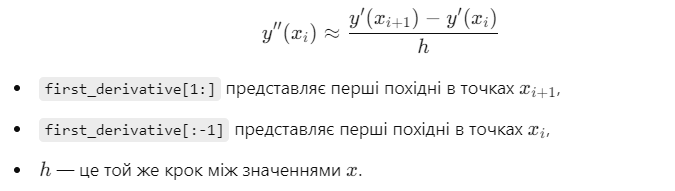

In [2]:
import numpy as np

# Крок таблиці
h = x_values[1] - x_values[0]

# Обчислення кінцевих різниць
# Перша похідна (наближено як (y[i+1] - y[i])/h)
first_derivative = (y_values[1:] - y_values[:-1]) / h

# Друга похідна (наближено як (y'[i+1] - y'[i])/h)
second_derivative = (first_derivative[1:] - first_derivative[:-1]) / h

# Виведення результатів
# Для x = 2.0 беремо індекс 1
idx = 1
print("-" * 30)
print("Спрощений метод:")
print(f"Перша похідна (x = 2.0): {round(first_derivative[idx], 3)}")
print(f"Друга похідна (x = 2.0): {round(second_derivative[idx], 3)}")

------------------------------
Спрощений метод:
Перша похідна (x = 2.0): -0.772
Друга похідна (x = 2.0): -0.136


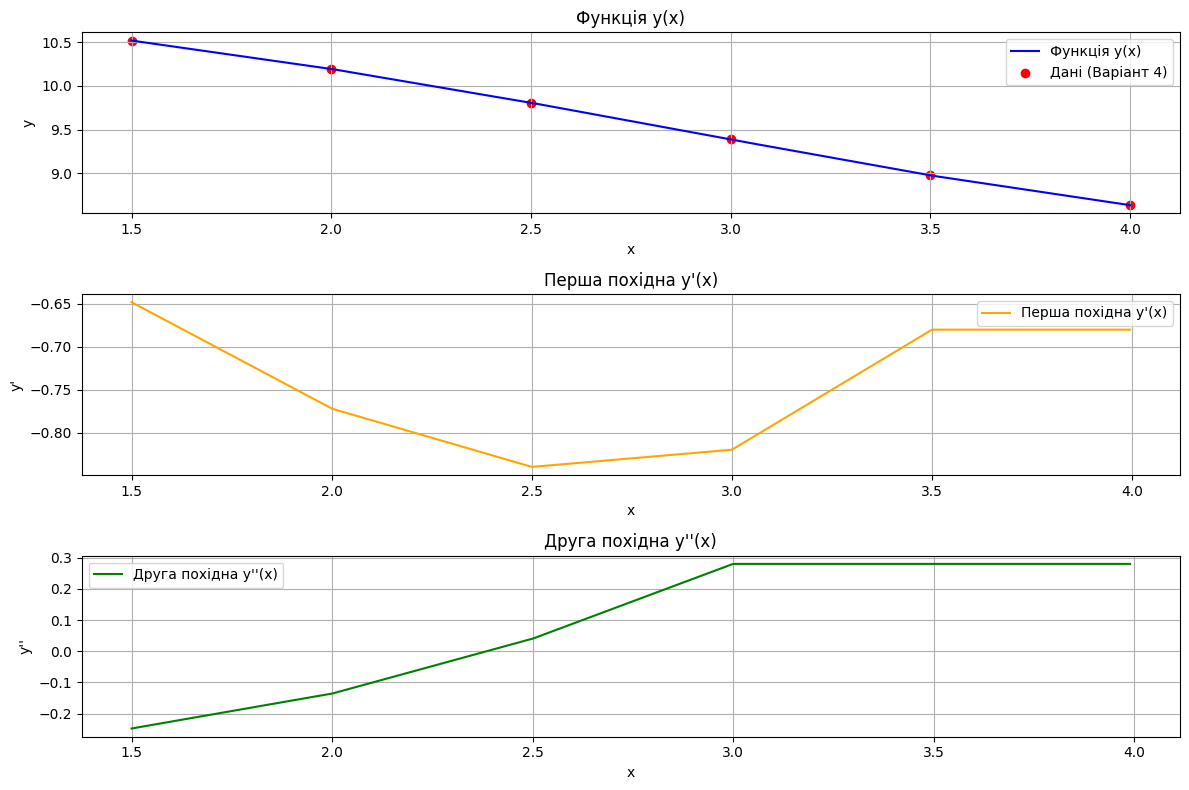

In [3]:
import matplotlib.pyplot as plt

# Інтерполяція значень для побудови графіків
x_fine = np.linspace(x_values[0], x_values[-1], 500)
y_fine = np.interp(x_fine, x_values, y_values)

# Обчислення першої та другої похідної для нових точок (для графіків)
# Увага: масиви похідних коротші за y_values, тому підрізаємо x_fine
first_deriv_fine = np.interp(x_fine[:-1], x_values[:-1], first_derivative)
second_deriv_fine = np.interp(x_fine[:-2], x_values[:-2], second_derivative)

# Створюємо графіки
plt.figure(figsize=(12, 8))

# Графік функції
plt.subplot(3, 1, 1)
plt.plot(x_fine, y_fine, label='Функція y(x)', color='blue')
plt.scatter(x_values, y_values, color='red', label='Дані (Варіант 4)')
plt.title('Функція y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Графік першої похідної
plt.subplot(3, 1, 2)
# Оскільки first_deriv_fine розрахований на меншому діапазоні, беремо відповідний шматок x_fine
plt.plot(x_fine[:-1], first_deriv_fine, label="Перша похідна y'(x)", color='orange')
plt.title("Перша похідна y'(x)")
plt.xlabel('x')
plt.ylabel("y'")
plt.legend()
plt.grid(True)

# Графік другої похідної
plt.subplot(3, 1, 3)
plt.plot(x_fine[:-2], second_deriv_fine, label="Друга похідна y''(x)", color='green')
plt.title("Друга похідна y''(x)")
plt.xlabel('x')
plt.ylabel("y''")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()